In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from sklearn import datasets
olive = datasets.fetch_olivetti_faces()

In [35]:
olive['data']


array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [36]:
olive['images']

array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17355372],
        [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033,
         0.16115703, 0.16528925],
        [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256,
         0.16115703, 0.1570248 ]],

       [[0.45454547, 0.47107437, 0.5123967 , ..., 0.19008264,
         0.18595041, 0.18595041],
        [0.446281  , 0.48347107, 0.5206612 , ..., 0.21487603,
         0.2107438 , 0.2107438 ],
        [0.49586776, 0.5165289 , 0.53305787, ..., 0.20247933,
         0.20661157, 0.20661157],
        ...,
        [0.77272725, 0.78099173, 0.7933884 , ..., 0.1446281 ,
         0.1446281 , 0.1446281 ],
        [0.7

In [37]:


olive['target']

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [38]:
print(olive['data'].shape,olive['images'].shape,olive['target'].shape)

(400, 4096) (400, 64, 64) (400,)


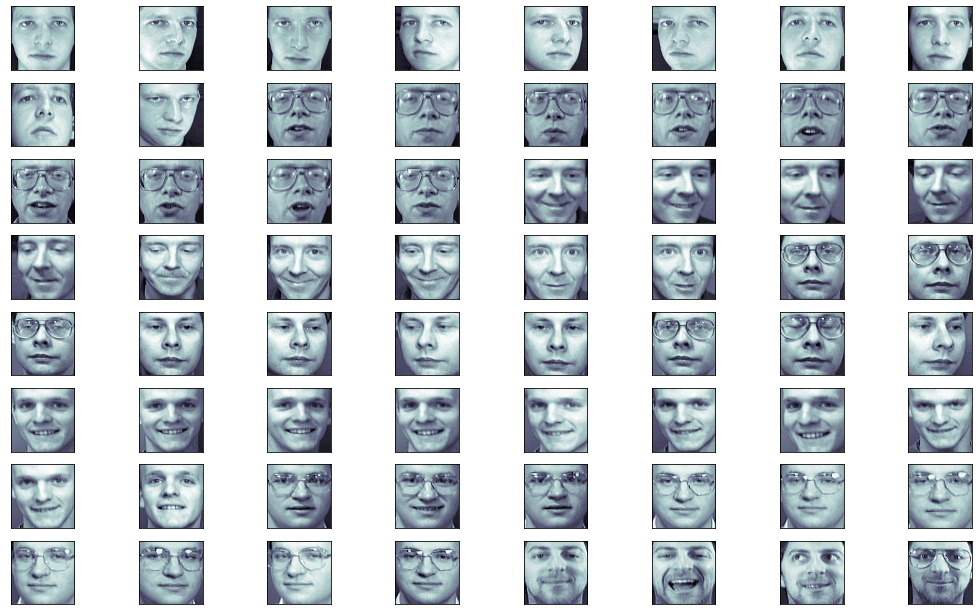

In [39]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(18,11))
# plot several images
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(olive.images[i], cmap=plt.cm.bone)

In [40]:
X=olive.data
y=olive.target

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
        y, random_state=0)

print(X_train.shape, X_test.shape)

(300, 4096) (100, 4096)


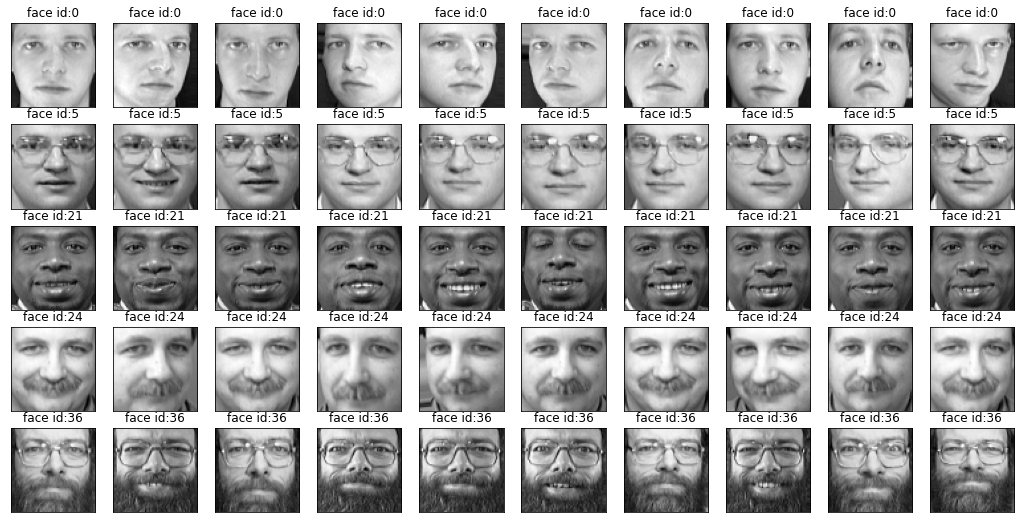

In [42]:
def show_10_faces_of_n_subject(images, subject_ids):
    cols=10# each subject has 10 distinct face images
    rows=(len(subject_ids)*10)/cols #
    rows=int(rows)
    
    fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    #axarr=axarr.flatten()
    
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index=subject_id*10 + j
            axarr[i,j].imshow(images[image_index], cmap="gray")
            axarr[i,j].set_xticks([])
            axarr[i,j].set_yticks([])
            axarr[i,j].set_title("face id:{}".format(subject_id))
    
#You can playaround subject_ids to see other people faces
show_10_faces_of_n_subject(images=olive.images, subject_ids=[0,5, 21, 24, 36])

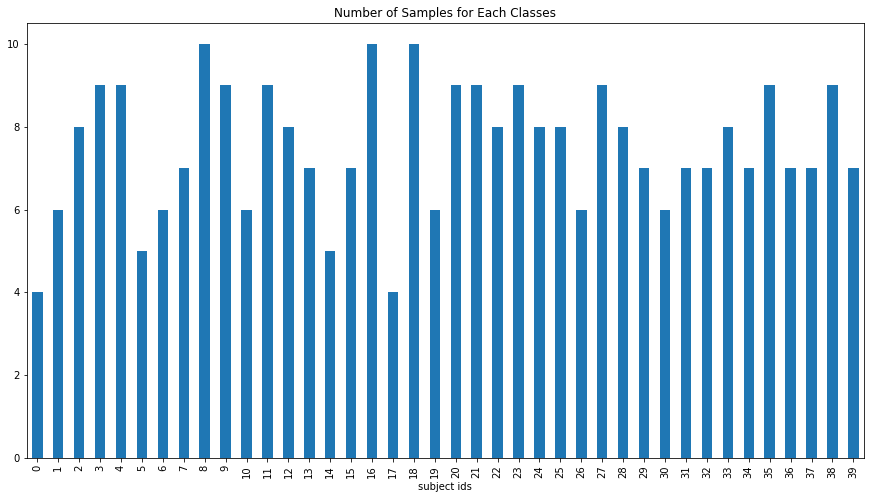

In [43]:
y_frame=pd.DataFrame()
y_frame['subject ids']=y_train
y_frame.groupby(['subject ids']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [44]:
!pip install mglearn
import mglearn

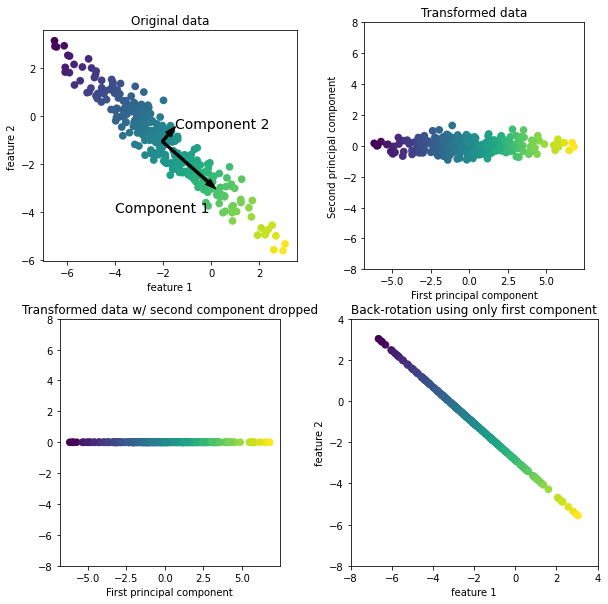

In [45]:
mglearn.plots.plot_pca_illustration()

In [46]:
#PCA Projection of Defined Number of Target

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X)
X_pca=pca.transform(X)

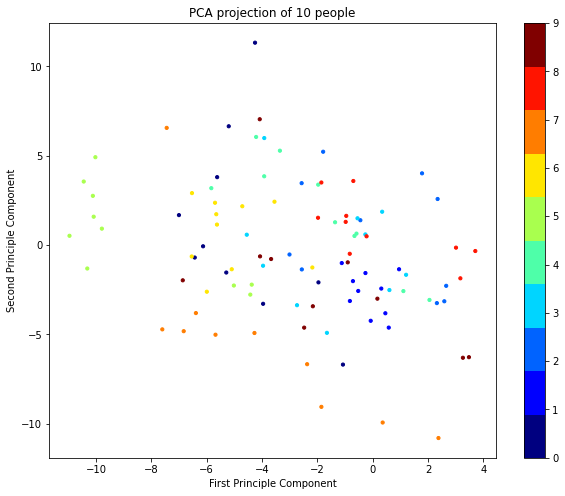

In [48]:
number_of_people=10
index_range=number_of_people*10
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],
            X_pca[:index_range,1], 
            c=olive.target[:index_range],
            s=10,
           cmap=plt.get_cmap('jet', number_of_people)
          )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

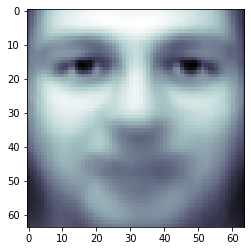

In [49]:
plt.imshow(pca.mean_.reshape(olive.images[0].shape),
           cmap=plt.cm.bone)

In [50]:
n_components=90

In [51]:
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=90, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

Text(0.5, 1.0, 'Average Face')

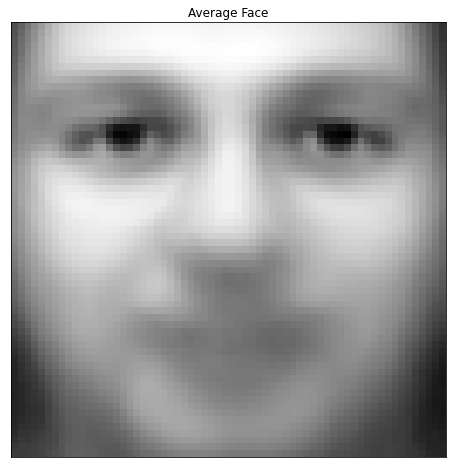

In [52]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

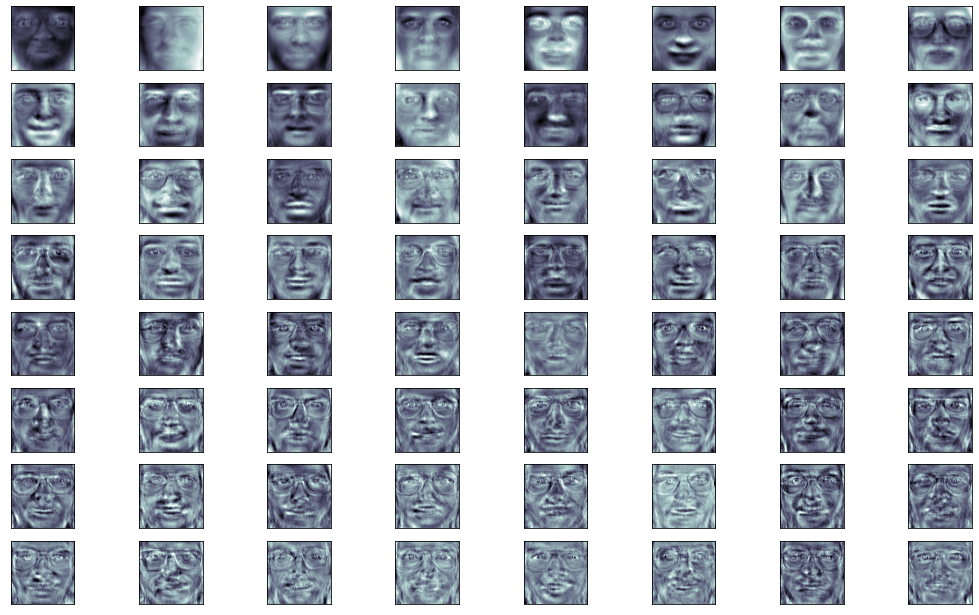

In [53]:
fig = plt.figure(figsize=(18, 11))
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(olive.images[0].shape),
              cmap=plt.cm.bone)

In [54]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)


(300, 90)


In [55]:
print(X_test_pca.shape)

(100, 90)


In [56]:
print(pca.components_)

[[-0.00767622 -0.01110459 -0.01440799 ...  0.00339144  0.00610869
   0.00586235]
 [-0.02827751 -0.03275257 -0.03728788 ...  0.02778535  0.02547629
   0.02392417]
 [ 0.0042143   0.00121792 -0.0004006  ... -0.01250078 -0.00990313
  -0.00755793]
 ...
 [-0.00183072 -0.00260789 -0.00707381 ...  0.01195758  0.02516582
   0.03783944]
 [-0.03081436 -0.03501034  0.00855879 ... -0.01564668  0.02392136
   0.0043148 ]
 [ 0.02787685  0.01650369  0.02921852 ... -0.01493449 -0.04121934
  -0.03304813]]


In [57]:
print(pca.explained_variance_)

[17.682148   11.195795    6.2631254   3.8116443   2.8429952   2.5053535
  2.020186    1.6217984   1.5571343   1.2958368   1.2444769   1.1398832
  1.0032995   0.91613466  0.84025943  0.780967    0.74309593  0.67029893
  0.6120845   0.5802099   0.5163462   0.50135237  0.48395184  0.4529173
  0.42625618  0.41294557  0.39630896  0.3779229   0.348888    0.3358818
  0.30073026  0.29209048  0.27390125  0.26918656  0.26182774  0.24953385
  0.2466004   0.23875502  0.23481399  0.2166265   0.21327254  0.20890106
  0.19720633  0.19158286  0.18950862  0.18725705  0.18270425  0.17927615
  0.17142233  0.16901468  0.16275491  0.15746465  0.15038235  0.14845277
  0.14480506  0.14053586  0.13871428  0.13497974  0.13239098  0.12977107
  0.12644349  0.12447373  0.12217257  0.1207786   0.11503067  0.11428436
  0.11219987  0.11100186  0.10829857  0.10622807  0.10540865  0.10135949
  0.10026448  0.09775123  0.09384089  0.0938025   0.09260146  0.09034371
  0.0895034   0.08660179  0.08550043  0.08364874  0.082

In [58]:
print(pca.explained_variance_ratio_)

[0.22858615 0.14473376 0.08096661 0.04927507 0.03675285 0.03238798
 0.02611597 0.02096581 0.02012987 0.01675194 0.01608799 0.01473585
 0.01297016 0.01184334 0.01086246 0.01009596 0.00960638 0.0086653
 0.00791273 0.00750067 0.00667507 0.00648124 0.00625629 0.00585509
 0.00551043 0.00533836 0.00512329 0.0048856  0.00451025 0.00434212
 0.00388769 0.003776   0.00354086 0.00347991 0.00338478 0.00322585
 0.00318793 0.00308651 0.00303556 0.00280044 0.00275708 0.00270057
 0.00254939 0.00247669 0.00244987 0.00242077 0.00236191 0.00231759
 0.00221606 0.00218494 0.00210402 0.00203563 0.00194407 0.00191912
 0.00187197 0.00181678 0.00179323 0.00174495 0.00171149 0.00167762
 0.0016346  0.00160914 0.00157939 0.00156137 0.00148706 0.00147741
 0.00145046 0.00143498 0.00140003 0.00137326 0.00136267 0.00131033
 0.00129617 0.00126368 0.00121313 0.00121263 0.00119711 0.00116792
 0.00115706 0.00111955 0.00110531 0.00108137 0.00106452 0.00103591
 0.00100619 0.00099882 0.00098708 0.00094344 0.00091047 0.00089

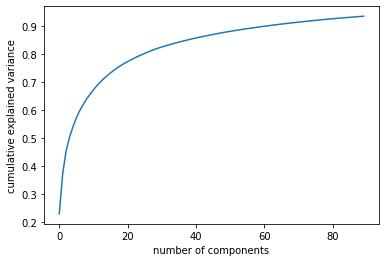

In [59]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [61]:
def minvariance(pca): 
  return pca.noise_variance_
def maxvariance(pca):
  return pca.explained_variance_
print(" min variance is {0}".format(minvariance(pca)))
print(" max variance  {0}".format(maxvariance(pca)))

 min variance is 0.023677462623232885
 max variance  [17.682148   11.195795    6.2631254   3.8116443   2.8429952   2.5053535
  2.020186    1.6217984   1.5571343   1.2958368   1.2444769   1.1398832
  1.0032995   0.91613466  0.84025943  0.780967    0.74309593  0.67029893
  0.6120845   0.5802099   0.5163462   0.50135237  0.48395184  0.4529173
  0.42625618  0.41294557  0.39630896  0.3779229   0.348888    0.3358818
  0.30073026  0.29209048  0.27390125  0.26918656  0.26182774  0.24953385
  0.2466004   0.23875502  0.23481399  0.2166265   0.21327254  0.20890106
  0.19720633  0.19158286  0.18950862  0.18725705  0.18270425  0.17927615
  0.17142233  0.16901468  0.16275491  0.15746465  0.15038235  0.14845277
  0.14480506  0.14053586  0.13871428  0.13497974  0.13239098  0.12977107
  0.12644349  0.12447373  0.12217257  0.1207786   0.11503067  0.11428436
  0.11219987  0.11100186  0.10829857  0.10622807  0.10540865  0.10135949
  0.10026448  0.09775123  0.09384089  0.0938025   0.09260146  0.09034371
  

In [63]:
"""from __future__ import division
from __future__ import print_function

import numpy as np
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA as sklearn_PCA
from sklearn.utils.validation import check_is_fitted
from sklearn.utils.validation import check_array
import pprint


class PCA(BaseDetector):

    def __init__(self, n_components=None, n_selected_components=None,
                 contamination=0.1, copy=True, whiten=False, svd_solver='auto',
                 tol=0.0, iterated_power='auto', random_state=None,
                 weighted=True, standardization=True):

        super(PCA, self).__init__(contamination=contamination)
        self.n_components = n_components
        self.n_selected_components = n_selected_components
        self.copy = copy
        self.whiten = whiten
        self.svd_solver = svd_solver
        self.tol = tol
        self.iterated_power = iterated_power
        self.random_state = random_state
        self.weighted = weighted
        self.standardization = standardization

    # noinspection PyIncorrectDocstring
    def fit(self, X, y=None):
     
        # validate inputs X and y (optional)
        X = check_array(X)
        self._set_n_classes(y)

        # PCA is recommended to use on the standardized data (zero mean and
        # unit variance).
        if self.standardization:
            X, self.scaler_ = standardizer(X, keep_scalar=True)

        self.detector_ = sklearn_PCA(n_components=self.n_components,
                                     copy=self.copy,
                                     whiten=self.whiten,
                                     svd_solver=self.svd_solver,
                                     tol=self.tol,
                                     iterated_power=self.iterated_power,
                                     random_state=self.random_state)
        self.detector_.fit(X=X, y=y)

        # copy the attributes from the sklearn PCA object
        self.n_components_ = self.detector_.n_components_
        self.components_ = self.detector_.components_

        # validate the number of components to be used for outlier detection
        if self.n_selected_components is None:
            self.n_selected_components_ = self.n_components_
        else:
            self.n_selected_components_ = self.n_selected_components
        check_parameter(self.n_selected_components_, 1, self.n_components_,
                        include_left=True, include_right=True,
                        param_name='n_selected_components_')

        # use eigenvalues as the weights of eigenvectors
        self.w_components_ = np.ones([self.n_components_, ])
        if self.weighted:
            self.w_components_ = self.detector_.explained_variance_ratio_

        
        self.selected_components_ = self.components_[
                                    -1 * self.n_selected_components_:, :]
        self.selected_w_components_ = self.w_components_[
                                      -1 * self.n_selected_components_:]

        self.decision_scores_ = np.sum(
            cdist(X, self.selected_components_) / self.selected_w_components_,
            axis=1).ravel()

        self._process_decision_scores()
        return self

    def decision_function(self, X):
        check_is_fitted(self, ['components_', 'w_components_'])

        X = check_array(X)
        if self.standardization:
            X = self.scaler_.transform(X)

        return np.sum(
            cdist(X, self.selected_components_) / self.selected_w_components_,
            axis=1).ravel()

    @property
    def explained_variance_(self):
        
        return self.detector_.explained_variance_

    @property
    def explained_variance_ratio_(self):
        
        return self.detector_.explained_variance_ratio_

    @property
    def singular_values_(self):
       
        return self.detector_.singular_values_

    @property
    def mean_(self):
       
        return self.detector_.mean_

    @property
    def noise_variance_(self):
        
        return self.detector_.noise_variance_
    def noise_variance_ratio(self):
        
        return self.detector_.noise_variance_ratio"""
        

"from __future__ import division\nfrom __future__ import print_function\n\nimport numpy as np\nfrom scipy.spatial.distance import cdist\nfrom sklearn.decomposition import PCA as sklearn_PCA\nfrom sklearn.utils.validation import check_is_fitted\nfrom sklearn.utils.validation import check_array\nimport pprint\n\n\nclass PCA(BaseDetector):\n\n    def __init__(self, n_components=None, n_selected_components=None,\n                 contamination=0.1, copy=True, whiten=False, svd_solver='auto',\n                 tol=0.0, iterated_power='auto', random_state=None,\n                 weighted=True, standardization=True):\n\n        super(PCA, self).__init__(contamination=contamination)\n        self.n_components = n_components\n        self.n_selected_components = n_selected_components\n        self.copy = copy\n        self.whiten = whiten\n        self.svd_solver = svd_solver\n        self.tol = tol\n        self.iterated_power = iterated_power\n        self.random_state = random_state\n       

In [64]:
#Classification Results


In [65]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [72]:
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.88


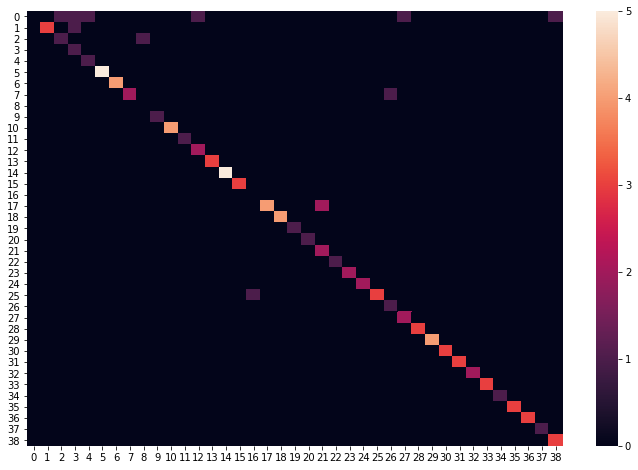

In [73]:
import seaborn as sns
plt.figure(1, figsize=(12,8))
sns.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [75]:
#validate result
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
pca=PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca=pca.transform(X)
for name, model in models:
    kfold=KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_scores=cross_val_score(model, X_pca, target, cv=kfold)
    print("{} mean cross validations score:{:.2f}".format(name, cv_scores.mean()))

In [77]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       1.00      0.75      0.86         4
           2       0.50      0.50      0.50         2
           3       0.33      1.00      0.50         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         0
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          16       0.00      0.00      0.00         0
   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
